In [483]:
df = pd.read_csv("/Users/carlfrederick/ds/metis/sf17_ds8/challenges/challenges_data/2013_movies.csv")
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [637]:
# if needed: conda install requests
import pandas as pd
import numpy as np
import requests
import re
from bs4 import BeautifulSoup

def loadyear(year, rows):
    url = 'http://www.boxofficemojo.com/yearly/chart/?yr={}'.format(year)
    response = requests.get(url)
    page = response.text

    soup = BeautifulSoup(page, "lxml")

    tab = soup.find_all('table')
    gtable = [x for x in tab if 'Total Gross' in x.text]
    gta = gtable[0].find_all('a')
    movies = [x for x in gta if '/movies/' in str(x)]

    i = 0
    for movie in movies:

        url = 'http://www.boxofficemojo.com'+movie['href']

        responsetest = requests.get(url)
        pagetest = responsetest.text
        soupm = BeautifulSoup(pagetest, "lxml")
        pv = parse_values(soupm)
        print(i, pv[0])
        i+=1
        rows.append(pv)
    
    
rows = []
for year in range(2006,2017):
    loadyear(year, rows)

df = pd.DataFrame(rows, columns = ['Title', 'Rating', 'Genre', 'Director', 'Producer', 'Foreign Gross', 'Opening Weekend', 'Widest Release', 'Budget', 'Release Date', 'Domestic Gross', 'Runtime'])
#df.dropna(how='any', inplace=True)
df

0 Pirates of the Caribbean: Dead Man's Chest
1 Night at the Museum
2 Cars
3 X-Men: The Last Stand
4 The Da Vinci Code
5 Superman Returns
6 Happy Feet
7 Ice Age: The Meltdown
8 Casino Royale
9 The Pursuit of Happyness
10 Over the Hedge
11 Talladega Nights: The Ballad of Ricky Bobby
12 Click
13 Mission: Impossible III
14 The Departed
15 Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan
16 The Devil Wears Prada
17 The Break-Up
18 Dreamgirls
19 Scary Movie 4
20 Failure to Launch
21 Inside Man
22 Open Season
23 The Santa Clause 3: The Escape Clause
24 Charlotte's Web
25 The Pink Panther
26 Eight Below
27 Saw III
28 Nacho Libre
29 You, Me and Dupree
30 Eragon
31 Monster House
32 Jackass: Number Two
33 Barnyard: The Original Party Animals
34 RV
35 V for Vendetta
36 World Trade Center
37 Rocky Balboa
38 Big Momma's House 2
39 Step Up
40 Flushed Away
41 Deja Vu
42 Miami Vice
43 Tyler Perry's Madea's Family Reunion
44 The Holiday
45 The Fast and the Furious: Tok

5 Inception
6 Despicable Me
7 Shrek Forever After
8 How to Train Your Dragon
9 Tangled
10 The Karate Kid
11 Tron Legacy
12 True Grit
13 Clash of the Titans
14 Grown Ups
15 Little Fockers
16 Megamind
17 The King's Speech
18 The Last Airbender
19 Shutter Island
20 The Other Guys
21 Salt
22 Jackass 3-D
23 Valentine's Day
24 Black Swan
25 Robin Hood
26 The Chronicles of Narnia: The Voyage of the Dawn Treader
27 The Expendables
28 Due Date
29 Yogi Bear
30 Date Night
31 The Social Network
32 Sex and the City 2
33 The Book of Eli
34 The Fighter
35 The Town
36 Prince of Persia: The Sands of Time
37 Red
38 Percy Jackson & The Olympians: The Lightning Thief
39 Paranormal Activity 2
40 Unstoppable
41 Eat Pray Love
42 Dear John
43 The A-Team
44 Knight & Day
45 Dinner for Schmucks
46 The Tourist
47 The Bounty Hunter
48 Diary of a Wimpy Kid
49 The Sorcerer's Apprentice
50 A Nightmare on Elm Street
51 The Last Song
52 The Wolfman
53 Get Him to the Greek
54 Resident Evil: Afterlife
55 Tyler Perry's Wh

15 Interstellar
16 How to Train Your Dragon 2
17 Gone Girl
18 Divergent
19 Neighbors
20 Ride Along
21 Rio 2
22 Into the Woods
23 Lucy
24 The Fault in our Stars
25 Unbroken
26 Night at the Museum: Secret of the Tomb
27 Mr. Peabody & Sherman
28 300: Rise of An Empire
29 The Maze Runner
30 The Equalizer
31 Noah
32 Edge of Tomorrow
33 Non-Stop
34 Heaven is for Real
35 The Imitation Game
36 Dumb and Dumber To
37 Annie
38 Fury
39 Tammy
40 Annabelle
41 The Other Woman
42 Penguins of Madagascar
43 Let's Be Cops
44 The Monuments Men
45 Hercules
46 The Purge: Anarchy
47 Alexander and the Terrible, Horrible, No Good, Very Bad Day
48 Think Like a Man Too
49 Exodus: Gods and Kings
50 The Nut Job
51 God's Not Dead
52 Son of God
53 The Grand Budapest Hotel
54 Planes: Fire & Rescue
55 RoboCop
56 Dracula Untold
57 Horrible Bosses 2
58 The Hundred-Foot Journey
59 No Good Deed
60 Selma
61 Muppets Most Wanted
62 Ouija
63 The Boxtrolls
64 Jack Ryan: Shadow Recruit
65 If I Stay
66 The Book of Life
67 About 

,Title,Rating,Genre,Director,Producer,Foreign Gross,Opening Weekend,Widest Release,Budget,Release Date,Domestic Gross,Runtime
0,Pirates of the Caribbean: Dead Man's Chest,PG-13,Period Adventure,Gore Verbinski,Jerry Bruckheimer,642863913.0,135634554,4133,225000000.0,2006-07-07,423315812,151
1,Night at the Museum,PG,Family Adventure,Shawn Levy,Chris Columbus,323617573.0,30433781,3768,NaN,2006-12-22,250863268,108
2,Cars,G,Animation,John Lasseter,Darla K. Anderson,218133298.0,60119509,3988,120000000.0,2006-06-09,244082982,116
3,X-Men: The Last Stand,PG-13,Action / Adventure,Brett Ratner,Avi Arad,224997093.0,102750665,3714,210000000.0,2006-05-26,234362462,104
4,The Da Vinci Code,PG-13,Thriller,Ron Howard,Brian Grazer,540703713.0,77073388,3757,125000000.0,2006-05-19,217536138,149
5,Superman Returns,PG-13,Action / Adventure,Bryan Singer,Gilbert Adler,191000000.0,52535096,4065,270000000.0,2006-06-28,200081192,154
6,Happy Feet,PG,Animation,George Miller,Dana Goldberg,186335291.0,41533432,3804,100000000.0,2006-11-17,198000317,108
7,Ice Age: The Meltdown,PG,Animation,Carlos Saldanha,Christopher Meledandri,465610159.0,68033544,3969,80000000.0,2006-03-31,195330621,90
8,Casino Royale,PG-13,Action,Martin Campbell,Barbara Broccoli,431600000.0,40833156,3443,150000000.0,2006-11-17,167445960,144
9,The Pursuit of Happyness,PG-13,Drama,Gabriele Muccino,Todd Black,143510836.0,26541709,3169,55000000.0,2006-12-15,163566459,116


In [639]:
df.to_csv('movies.csv')

In [634]:
url = 'http://www.boxofficemojo.com'+movies[0]['href']
responsetest = requests.get(url)
pagetest = responsetest.text
soupm = BeautifulSoup(pagetest, "lxml")
As = soupm.find_all('a')
raw_budget = get_movie_value(soupm, 'Production Budget: ')
print(raw_budget)
to_budget(raw_budget)
raw_foreign = get_foreign_value(soupm, As, 'intl')
print(raw_foreign)
if raw_foreign:
    foreign = money_to_int(raw_foreign)
else:
    foreign = None
print(foreign)

$200 million
 $523,879,949
523879949


In [624]:
def get_movie_value(soup, field_name):
    '''Grab a value from boxofficemojo HTML
    
    Takes a string attribute of a movie on the page and
    returns the string in the next sibling object
    (the value for that attribute)
    or None if nothing is found.
    '''
    obj = soup.find(text=re.compile(field_name))
    if not obj: 
        return None
    # this works for most of the values
    next_sibling = obj.findNextSibling()
    if next_sibling:
        return next_sibling.text
    elif obj.parent.findNextSibling():
        return obj.parent.findNextSibling().text
    else:
        return None

In [566]:
def get_foreign_value(soup, As, field_name):
    '''Special code to get the Foreign total boxoffice
    '''
    
    obj = [x for x in As if field_name in x['href']][2]
    # this works for most of the values
    next_sibling = obj.parent.findParent().find_all('td')
    if next_sibling:
        return next_sibling[1].text 
    else:
        return None

In [506]:
def get_opening_value(soup, As, field_name):
    '''Special code to get the opening weekend boxoffice
    '''
    obj = [x for x in As if field_name in x['href'] if x.text.replace('\xa0',' ') == 'Opening Weekend:' or x.text.replace('\xa0',' ') == 'Wide Opening Weekend:']
    if len(obj) == 0:
        return None
    # this works for most of the values
    next_sibling = obj[0].parent.findParent().find_all('td')[1]
    if next_sibling:
        return next_sibling.text 
    else:
        return None

In [452]:
def get_widest_value(soup, field_name):
    '''Special code to get the widest release 
    '''
    obj = soup.find('td', text=re.compile('Widest'))
    if not obj: 
        return None
    # this works for most of the values
    next_sibling = obj.findNextSibling()
    if next_sibling:
        return next_sibling.text
    else:
        return None

In [577]:
def get_player(soup, As, field_name):
        obj = [x for x in As if field_name in x['href']]
        #print(obj)
        if len(obj)>1:
            return obj[1].text
        elif len(obj)==1:
            return obj[0].parent.parent.findNextSibling().text
        else:
            return ''

In [636]:
import dateutil.parser

def to_title(titlestring):
    title = titlestring.split('(')[0].strip()
    return title

def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '').replace('\xa0','')
    if moneystring.isnumeric():
        return int(moneystring)
    else:
        return None

def runtime_to_minutes(runtimestring):
    runtime = runtimestring.split()
    try:
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return None

def to_widest(wideststring):
    return int(wideststring.split()[0].replace('\xa0','').replace(',',''))

def to_budget(budgetstring):
    if budgetstring == 'N/A':
        return None
    budgetstring = budgetstring.replace(',','').replace('$','')
    if budgetstring.isnumeric():
        return int(budgetstring)
    p = budgetstring.split()
    p[0] = float(p[0])
    p[1] = {'million':1000000, 'thousand':1000}[p[1]]
    
    return int(p[0]*p[1])

In [570]:
def parse_values(soup):
    
    As = soup.find_all('a')
    
    raw_title = soup.find('title').text
    title = to_title(raw_title)
    
    rating = get_movie_value(soup, 'MPAA Rating')
    
    genre = get_movie_value(soup, 'Genre: ')

    director = get_player(soup, As, 'Director')
    
    producer = get_player(soup, As, 'Producer')
    
    raw_foreign = get_foreign_value(soup, As, 'intl')
    if raw_foreign:
        foreign = money_to_int(raw_foreign)
    else:
        foreign = None
    
    raw_opening = get_opening_value(soup, As, 'weekend')
    #print(raw_opening)
    if raw_opening:
        opening = money_to_int(raw_opening)
    else:
        opening = None
    
    raw_widest = get_widest_value(soup, 'Widest')
    widest = to_widest(raw_widest)
    
    raw_budget = get_movie_value(soup, 'Production Budget: ')
    budget = to_budget(raw_budget)
    
    raw_release_date = get_movie_value(soup,'Release Date')
    release_date = to_date(raw_release_date)

    raw_domestic_total_gross = get_movie_value(soup,'Domestic Total')
    domestic_total_gross = money_to_int(raw_domestic_total_gross)

    raw_runtime = get_movie_value(soup,'Runtime')
    runtime = runtime_to_minutes(raw_runtime)
    
    return title, rating, genre, director, producer, foreign, opening, widest, budget, release_date, domestic_total_gross, runtime

In [640]:
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

import seaborn as sns

# **Challenge 1 - Domestic Gross over time**

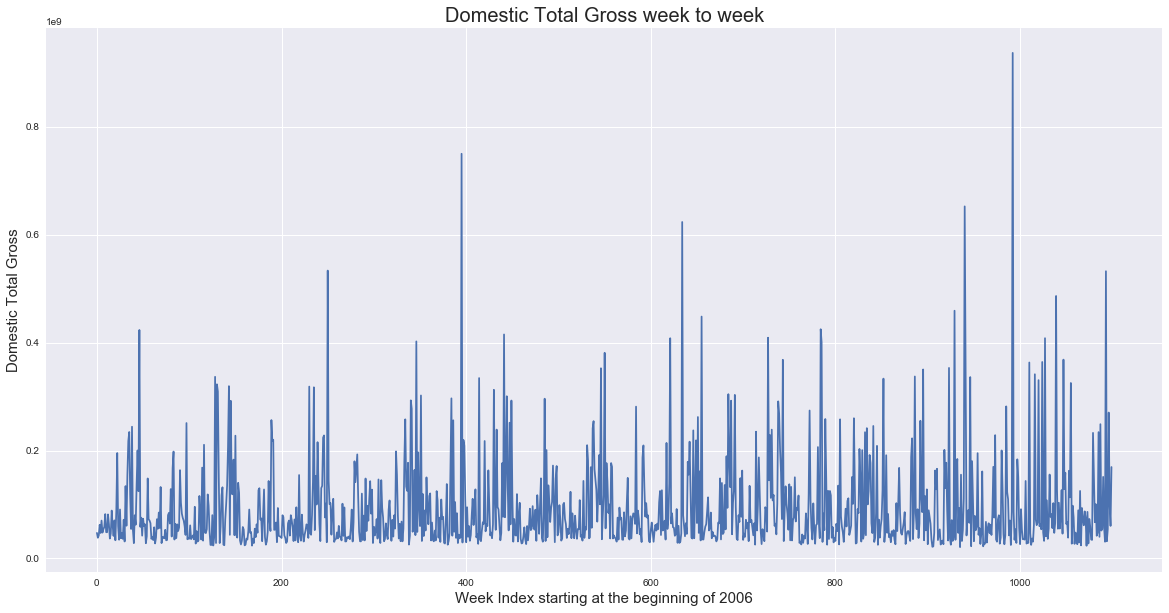

In [815]:
plt.figure(figsize=(20,10))
dfs = df.sort_values(('Release Date'))
plt.title('Domestic Total Gross week to week', fontsize=20)
plt.xlabel('Week Index starting at the beginning of 2006', fontsize=15)
plt.ylabel('Domestic Total Gross', fontsize=15)
plt.plot(list(dfs['Domestic Gross'])[0:]);

# **Challenge 2 - runtime vs. domestic total gross.**

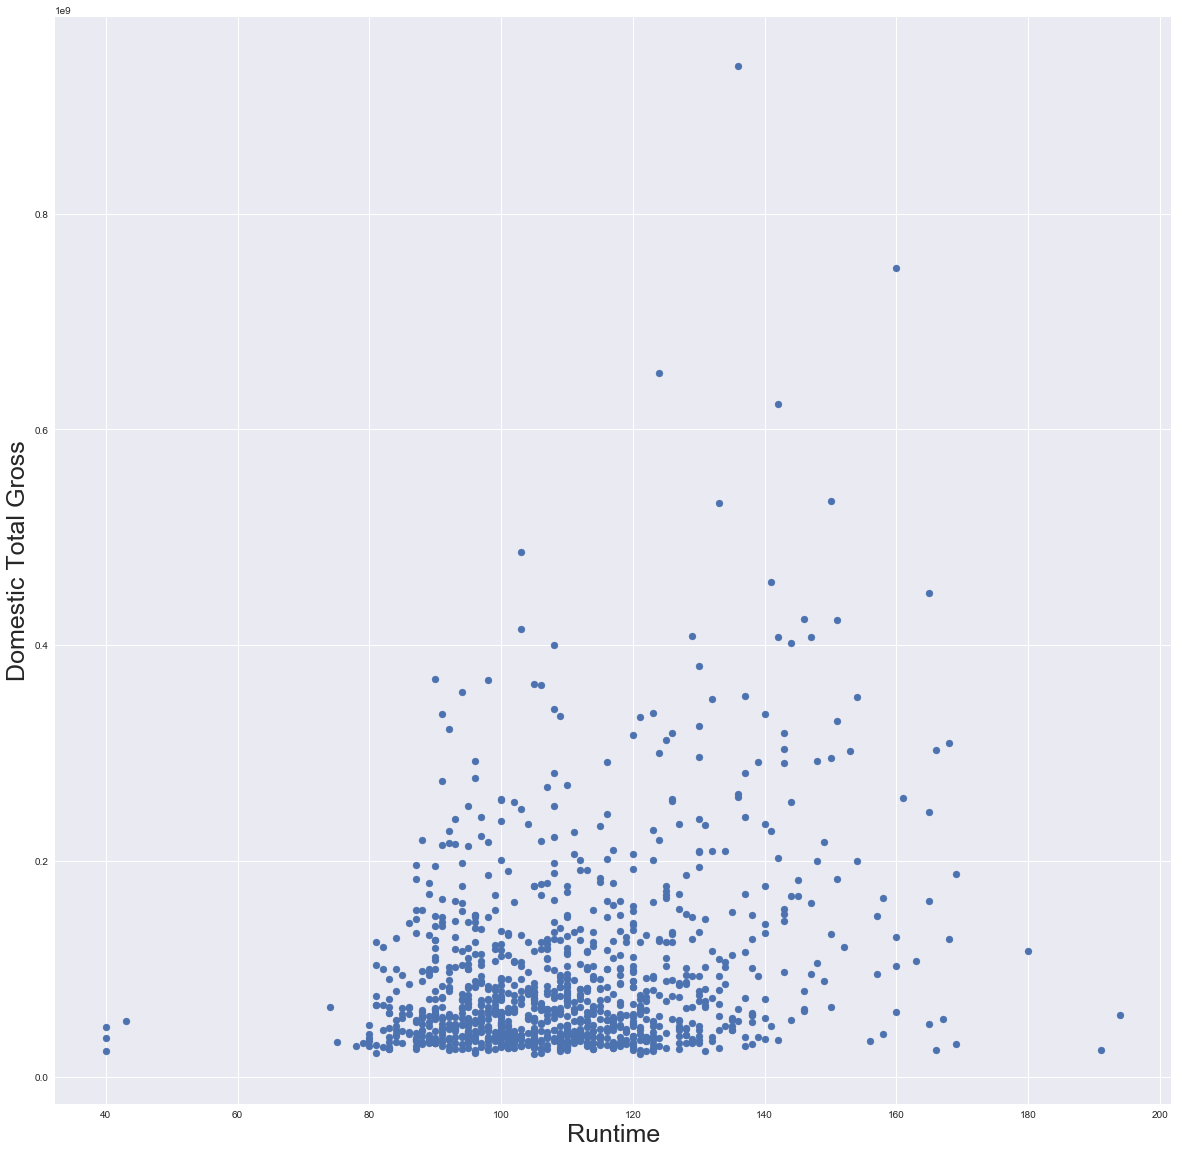

In [690]:
plt.figure(figsize=(20,20))
plt.xlabel('Runtime', fontsize=25)
plt.ylabel('Domestic Total Gross', fontsize=25)

plt.scatter(df['Runtime'], df['Domestic Gross']);


# **Challenge 3 - average runtime and domestic total gross, grouped by rating**

In [707]:
#df.groupby('Rating').agg({'Runtime':'mean', 'Domestic Gross':'mean'})
df.groupby('Rating')['Runtime', 'Domestic Gross'].mean()
pd.set_option('display.float_format', lambda x: '%d' % x)
#pd.reset_option('display.float_format')
df.groupby('Rating')[['Runtime','Domestic Gross']].mean()


,Runtime,Domestic Gross
Rating,,
G,92,101374082
PG,101,112740900
PG-13,113,104012492
R,111,67002617
Unrated,40,23746066


# **Challenge 4 - plot release date vs the domestic total gross, per rating**

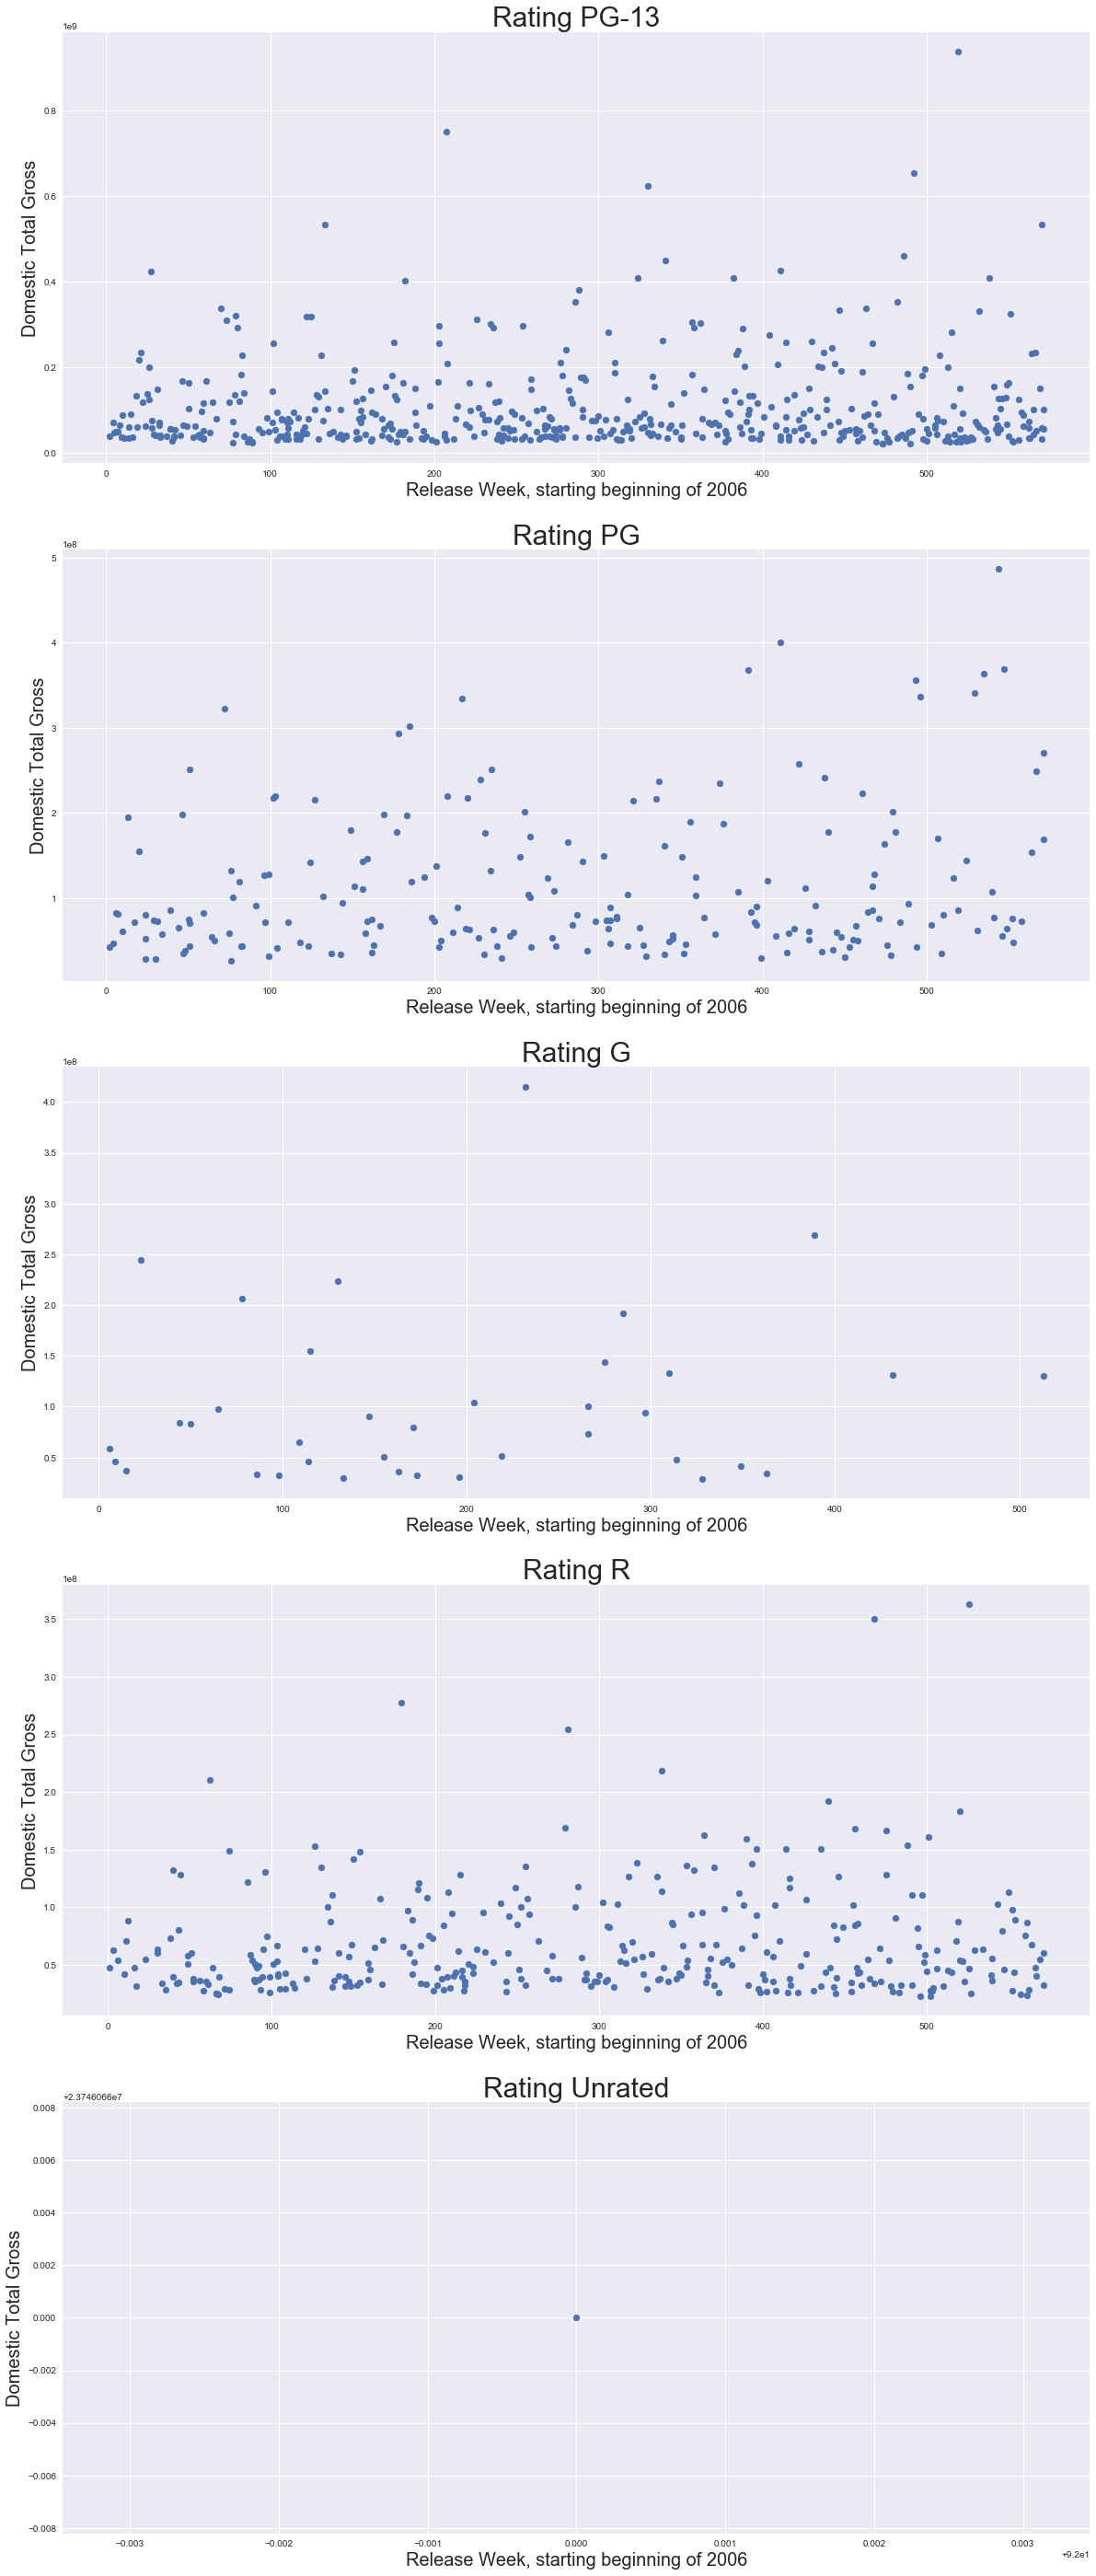

In [778]:
def date_to_integer(dt_time):
    #return 10000*dt_time.year + 100*dt_time.month + dt_time.day
    return 52*(dt_time.year-2006) + dt_time.week

#pd.reset_option('display.float_format')
ratings = df.Rating.unique()

fig, ax = plt.subplots(len(ratings),1, figsize=(20, 10*len(ratings)))

for i in range(len(ratings)):

    dfrating = df[df['Rating']==ratings[i]]
    dfdates = list(dfrating['Release Date'].map(date_to_integer))
    ax[i].scatter(dfdates, dfrating['Domestic Gross'])
    ax[i].set_xlabel('Release Week, starting beginning of 2006', fontsize=20)
    ax[i].set_ylabel('Domestic Total Gross', fontsize=20)
    ax[i].set_title('Rating '+ratings[i], fontsize=30);

# **Challenge 5 - director with highest average gross per movie**

In [777]:
pd.set_option('display.float_format', lambda x: '%d' % x)
df.groupby('Director')['Domestic Gross'].mean().sort_values(ascending=False).head(10)

Director
James Cameron     749766139
Colin Trevorrow   652270625
Joss Whedon       541181889
Lee Unkrich       415004880
Gary Ross         408010692
Gareth Edwards    366426696
Tim Miller        363070709
J.J. Abrams       336840977
James Gunn        333176600
Pete Docter       324732937
Name: Domestic Gross, dtype: float64

# **Challenge 6 - Mean domestic total gross per month**

In [783]:
pd.reset_option('display.float_format')

In [791]:
def date_to_month(dt_time):
    #return 10000*dt_time.year + 100*dt_time.month + dt_time.day
    return 12*(dt_time.year-2006) + dt_time.month
dfsBack = dfs[:]
dfs['Release Date'] = dfs['Release Date'].map(date_to_month)
dfs.head()

,Title,Rating,Genre,Director,Producer,Foreign Gross,Opening Weekend,Widest Release,Budget,Release Date,Domestic Gross,Runtime
66,Hostel,R,Horror,Eli Roth,,3.325e+07,19556099,2337,4.800e+06,1,47326473,95
80,Last Holiday,PG-13,Comedy / Drama,Wayne Wang,Laurence Mark,4.943e+06,12806188,2514,4.500e+07,1,38399961,112
71,Glory Road,PG,Sports Drama,,Jerry Bruckheimer,2.910e+05,13594734,2397,NaN,1,42647449,106
46,Underworld: Evolution,R,Action Horror,Len Wiseman,Gary Lucchesi,4.902e+07,26857181,3207,NaN,1,62318875,106
67,Nanny McPhee,PG,Family,Kirk Jones,Tim Bevan,7.535e+07,14503650,2148,2.500e+07,1,47144110,98


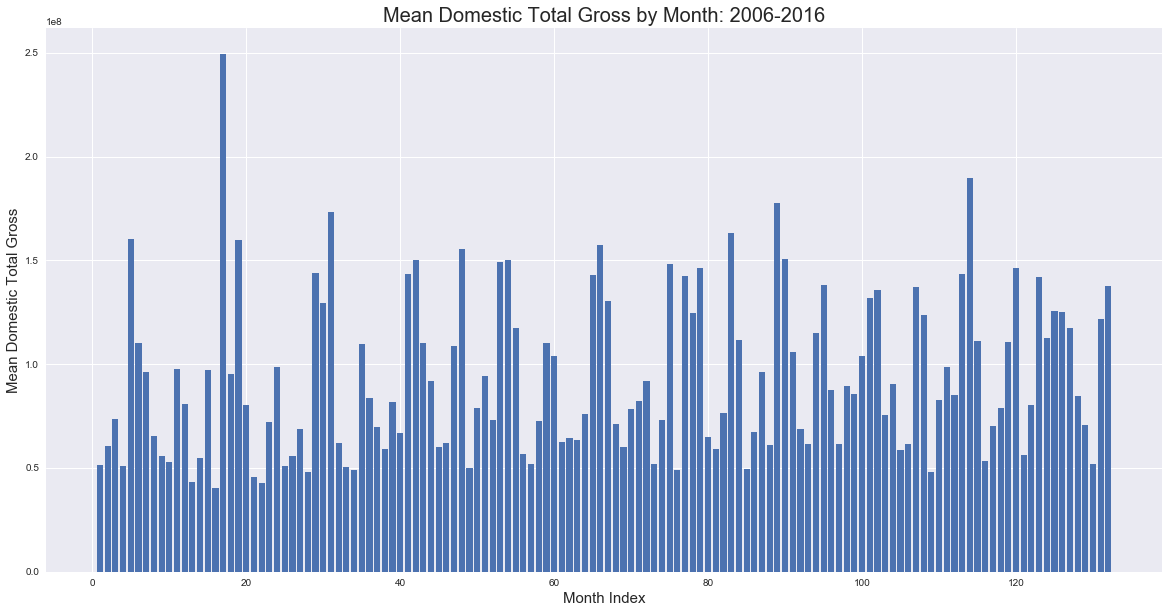

In [811]:
pd.set_option('display.float_format', lambda x: '%d' % x)

dfmg = dfs.groupby('Release Date')['Domestic Gross'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.xlabel('Month Index',fontsize=15)
plt.ylabel('Mean Domestic Total Gross',fontsize=15)
plt.title('Mean Domestic Total Gross by Month: 2006-2016', fontsize=20)
plt.bar(list(dfmg['Release Date'])[0:], list(dfmg['Domestic Gross'])[0:]);
